In [ ]:
pip install PyPortfolioOpt

In [ ]:
pip install yfinance

In [ ]:
pip install pulp

In [ ]:
pip install quandl

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def objective_function(w):
    w_tp=w.transpose()
    entropy_part=np.dot(w_tp,np.log(w))
    return entropy_part 
    
def equality_constraint_1(w):
    w_tp=w.transpose()
    return 1-np.dot(w_tp,ones)

def equality_constraint_2(w):
    w_tp=w.transpose()
    return u-np.dot(w_tp,returns)


df= pd.read_csv("capstone_input_data.csv")
df.Date = pd.to_datetime(df.Date, dayfirst = True)
df.set_index("Date", inplace = True)
df=df.pct_change()
df = df[1:]
df=df.dropna()
mean=df.mean()
cov=df.cov()
returns=mean.values*252
cov=cov.values*252
ones=np.ones((cov.shape[0],1))
u=0.1
bounds=[(-1000,1000),(-1000,1000),(-1000,1000),(-1000,1000),(-1000,1000)]
#bounds=[(-1000,1000),(-10000,1000),(-1000,1000),(-1000,1000),(-1000,1000)]
w0=[1,1,1,1,1]
constraint_1={'type': 'eq','fun':equality_constraint_1}
constraint_2={'type': 'eq','fun':equality_constraint_2}
constraint=[constraint_1,constraint_2]
result=minimize(objective_function,w0,method='SLSQP',bounds=bounds,constraints=constraint)
w=result['x']

print("------------------objective function entropy----------------------------")
for i in range(len(w)):
    print('weights'+ str(i+1) + ': ',"{:.19f}".format(float(w[i])))

w_tp=w.transpose()
portfolio_variance=np.dot(np.dot(w_tp,cov),w)
portfolio_return=np.dot(w_tp,returns)
portfolio_entropy=-1*np.dot(w_tp,np.log(w))

print("portfolio risk : " , np.sqrt(portfolio_variance) )
print("portfolio return : " , portfolio_return)
print("portfolio entropy : " , portfolio_entropy)
trial_numbers=20000
all_weights=np.zeros((trial_numbers,len(w)))
all_risk=np.zeros((trial_numbers))
all_returns=np.zeros((trial_numbers))
all_entropy=np.zeros((trial_numbers))

for i in range(trial_numbers):
    #weights
    weights=np.random.uniform(size=len(w))
    weights=weights/np.sum(weights)
    all_weights[i]=weights
    #risk
    variance=np.dot(np.dot(weights.T,cov),weights)
    risk=np.sqrt(variance)
    all_risk[i]=risk
    #returns
    port_ret=np.dot(weights,returns)
    all_returns[i]=port_ret
    #entropy
    entropy_part=np.dot(weights.transpose(),np.log(weights))
    all_entropy[i]=-1*entropy_part

/var/folders/dh/cjyd2n_s6jv3g6srpjrvn0hw0000gn/T/ipykernel_22461/2700501215.py:8: RuntimeWarning: invalid value encountered in log
  entropy_part=np.dot(w_tp,np.log(w))


------------------objective function entropy----------------------------
weights1:  0.1835466936806712801
weights2:  0.5296644239266895537
weights3:  0.0215069319929177341
weights4:  0.2593076750857337687
weights5:  0.0059742753139876382
portfolio risk :  0.3352231025685891
portfolio return :  0.0999999999999536
portfolio entropy :  1.1109333370321808


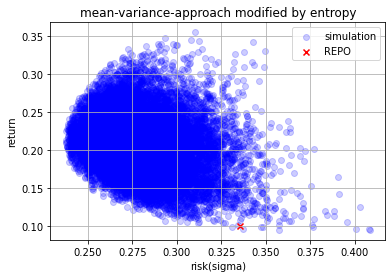

In [3]:
plt.figure()
plt.title("mean-variance-approach modified by entropy")
plt.scatter(all_risk,all_returns,marker="o",alpha=0.2,color='b',label="simulation")
plt.scatter(np.sqrt(portfolio_variance),portfolio_return,marker="x",color="r",label="REPO")
plt.xlabel("risk(sigma)")
plt.ylabel("return")
plt.legend()
plt.grid()

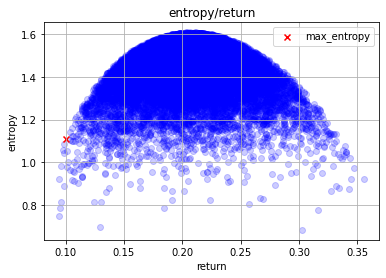

In [4]:
plt.figure()
plt.title("entropy/return")
plt.scatter(all_returns,all_entropy,color="b",alpha=0.2)
plt.scatter(portfolio_return,portfolio_entropy,color="r",label="max_entropy",marker='x')
plt.xlabel("return")
plt.ylabel("entropy")
plt.grid()
plt.legend()
plt.show()

------------------mean-variance-portfolio-optimization-approach----------------------------
weights1:  0.1835466936806712801
weights2:  0.5296644239266895537
weights3:  0.0215069319929177341
weights4:  0.2593076750857337687
weights5:  0.0059742753139876382
portfolio risk :  0.3352231025685891
portfolio return :  0.0999999999999536


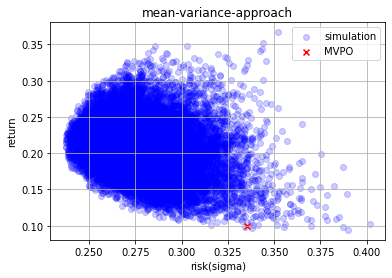

In [6]:
print("------------------mean-variance-portfolio-optimization-approach----------------------------")
for i in range(len(w)):
    print('weights'+ str(i+1) + ': ',"{:.19f}".format(float(w[i])))
w_tp=w.transpose()
portfolio_variance=np.dot(np.dot(w_tp,cov),w)
portfolio_return=np.dot(w_tp,returns)
print("portfolio risk : " ,np.sqrt(portfolio_variance))
print("portfolio return : ",portfolio_return)



trial_numbers=20000
all_weights=np.zeros((trial_numbers,len(w)))
all_risk=np.zeros((trial_numbers))
all_returns=np.zeros((trial_numbers))
for i in range(trial_numbers):
    #weights
    weights=np.random.uniform(size=len(w))
    weights=weights/np.sum(weights)
    all_weights[i]=weights
    #risk
    variance=np.dot(np.dot(weights.T,cov),weights)
    risk=np.sqrt(variance)
    all_risk[i]=risk
    #returns
    port_ret=np.dot(weights,returns)
    all_returns[i]=port_ret

plt.figure()
plt.title("mean-variance-approach")
plt.scatter(all_risk,all_returns,marker="o",alpha=0.2,color='b',label="simulation")
plt.scatter(np.sqrt(portfolio_variance),portfolio_return,marker="x",color="r",label="MVPO")
plt.xlabel("risk(sigma)")
plt.ylabel("return")
plt.legend()
plt.grid()
plt.show()

------------------mean-varianve-portfolio-optimization-approach----------------------------
weights1:  0.1835466936806712801
weights2:  0.5296644239266895537
weights3:  0.0215069319929177341
weights4:  0.2593076750857337687
weights5:  0.0059742753139876382
portfolio risk :  0.3352231025685891
portfolio return :  0.0999999999999536


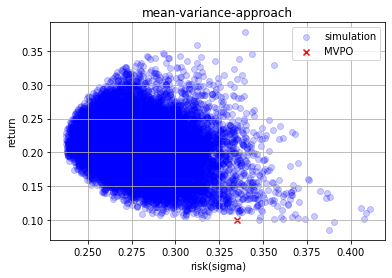

In [7]:
print("------------------mean-varianve-portfolio-optimization-approach----------------------------")
for i in range(len(w)):
    print('weights'+ str(i+1) + ': ',"{:.19f}".format(float(w[i])))
w_tp=w.transpose()
portfolio_variance=np.dot(np.dot(w_tp,cov),w)
portfolio_return=np.dot(w_tp,returns)
print("portfolio risk : " ,np.sqrt(portfolio_variance))
print("portfolio return : ",portfolio_return)



trial_numbers=20000
all_weights=np.zeros((trial_numbers,len(w)))
all_risk=np.zeros((trial_numbers))
all_returns=np.zeros((trial_numbers))
for i in range(trial_numbers):
    #weights
    weights=np.random.uniform(size=len(w))
    weights=weights/np.sum(weights)
    all_weights[i]=weights
    #risk
    variance=np.dot(np.dot(weights.T,cov),weights)
    risk=np.sqrt(variance)
    all_risk[i]=risk
    #returns
    port_ret=np.dot(weights,returns)
    all_returns[i]=port_ret

plt.figure()
plt.title("mean-variance-approach")
plt.scatter(all_risk,all_returns,marker="o",alpha=0.2,color='b',label="simulation")
plt.scatter(np.sqrt(portfolio_variance),portfolio_return,marker="x",color="r",label="MVPO")
plt.xlabel("risk(sigma)")
plt.ylabel("return")
plt.legend()
plt.grid()
plt.show()

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


class Return_Entropy_Portfolio_Optimization():
    def __init__(self,df,u,var):
        ## 主觀設定 expected portfolio return and the tolerate portfolio variance
        df=df.pct_change()
        df=df.dropna()
        self.initial_weight = np.ones((df.shape[1],1))
        self.bounds = [(0,1000),(0,1000),(0,1000),(0,1000),(0,1000)]
        self.mean = df.mean()
        self.cov = df.cov() * 252
        self.returns= df.mean().values*252
        self. u = u
        self. var = var
    def objective_function(self,w):
        w_tp=w.transpose()
        return np.dot(np.dot(w_tp,self.cov),w)
    def equality_constraint_1(self,w):
        w_tp=w.transpose()
        return 1-np.dot(w_tp,self.initial_weight)
    def equality_constraint_2(self,w):
        w_tp=w.transpose()
        return self.u-np.dot(w_tp,self.returns)
    def inequality_constraint(self,w):
        w_tp= w.transpose()
        return self.var -np.dot(np.dot(w_tp,self.cov),w)
    def optimization(self):
        constraint_1={'type': 'eq','fun':  self.equality_constraint_1}
        constraint_2={'type': 'eq','fun':  self.equality_constraint_2}
        constraint_3={'type':'ineq','fun': self.inequality_constraint}
        constraint=[constraint_1,constraint_2,constraint_3]
        result=minimize(self.objective_function,self.initial_weight,method='SLSQP',bounds=self.bounds,constraints=constraint)
        self.final_weight = result['x']
        return result['x']
    def print_result(self):
        for i in range(len(self.final_weight)):
            print('weights'+ str(i+1) + ': ',"{:.19f}".format(float(self.final_weight[i])))
        return self.final_weight